In [93]:
# Konfigurasi Spark
import os
import sys

# 1. Mengeset variabel yang menyimpan lokasi di mana Spark diinstal
spark_path = "C:\\Users\\Sabila\\Documents\\spark"

# 2. Menentukan environment variable SPARK_HOME
os.environ['SPARK_HOME'] = spark_path

# 3. Simpan lokasi winutils.exe sebagai environment variable HADOOP_HOME
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

# 6. Import library Spark
#    Dua library yang WAJIB di-import adalah **SparkContext** dan **SparkConf**.
from pyspark import SparkContext
from pyspark import SparkConf

# Setting konfigurasi (opsional)
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local) created by _run_module_as_main at C:\Users\Sabila\Anaconda3\lib\runpy.py:170 

In [94]:
from numpy import array
from math import sqrt
import re
import matplotlib.pyplot as plt

from pyspark.mllib.clustering import KMeans, KMeansModel

# Load and parse the data
data = sc.textFile("C:/Users/Sabila/Documents/ufo/complete.csv")
header = data.take(1)[0]
data = data.filter(lambda row: row!=header)
pat = re.compile("^([0-9])+\.([0-9])*$")
parsedData = data.map(lambda row: row.split(','))
parsedData = parsedData.map(lambda row: (row[9],row[10]))
parsedData = parsedData.filter(lambda row: re.match('^([0-9])+\.([0-9])*$',row[0]) and re.match('^([0-9])+\.([0-9])*$',row[1]))
parsedData = parsedData.map(lambda row: (float(row[0]),float(row[1])))

In [95]:
# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=2, initializationMode="random")

In [96]:
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

Within Set Sum of Squared Error = 37259.860065227454


In [107]:
predict = parsedData.map(clusters.predict)
label = predict.collect()
x = parsedData.map(lambda row: row[0]).collect()
y = parsedData.map(lambda row: row[1]).collect()

In [110]:
for i in range(len(label)):
    if (label[i]==1):
        color = "r";
    else:
        color = "b";
    lines = plt.plot(x[i], y[i], 'o')
    plt.setp(lines, color=color, linewidth=2.0)

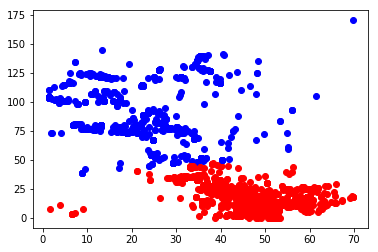

In [111]:
plt.show()